In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import IPython.html.widgets as widg
from IPython.display import clear_output
import sys
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
class Network:
    def __init__(self, shape):
        self.shape = np.array(shape) #shape is array-like, i.e. (2,3,4) is a 2 input, 3 hidden node, 4 output network
        self.weights = [np.random.ranf((self.shape[i],self.shape[i-1]))*.1 for i in range(1,len(self.shape))]
        self.biases = [np.random.ranf((self.shape[i],))*.1 for i in range(1,len(self.shape))]
        self.errors = [np.random.ranf((self.shape[i],)) for i in range(1,len(self.shape))]
        self.eta = .2
        self.lam = .01
    def sigmoid(self, inputs):
        return 1/(1+np.exp(-inputs))
    def feedforward(self, inputs):
        assert inputs.shape==self.shape[0] #inputs must feed directly into the first layer.
        self.activation = [np.zeros((self.shape[i],)) for i in range(len(self.shape))]
        self.activation[0] = inputs
        for i in range(1,len(self.shape)):
            self.activation[i]=self.sigmoid(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])
        return self.activation[-1]
    def comp_error(self, answer):
        assert answer.shape==self.activation[-1].shape
        self.errors[-1] = (self.activation[-1]-answer)*np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])/(np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])+1)**2
        for i in range(len(self.shape)-2, 0, -1):
            self.errors[i-1] = self.weights[i].transpose().dot(self.errors[i])*np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])/(np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])+1)**2
    def grad_descent(self):
        for i in range(len(self.biases)):
            self.biases[i]=self.biases[i]-self.eta*self.errors[i]
        for i in range(len(self.weights)):
            for j in range(self.weights[i].shape[0]):
                for k in range(self.weights[i].shape[1]):
                    self.weights[i][j,k] = (1-self.eta*self.lam/1000)*self.weights[i][j,k] - self.eta*self.activation[i][k]*self.errors[i][j]
    def train(self, inputs, answer):
        self.feedforward(inputs)
        self.comp_error(answer)
        self.grad_descent()

In [3]:
n1 = Network([2,15,1])
print n1.feedforward(np.array([1,2]))
for i in range(1000):
    n1.train(np.array([1,200]), np.array([.5]))
print n1.feedforward(np.array([1,2]))

[ 0.62066051]
[ 0.52002282]


In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data[0]*.01)

[ 0.    0.    0.05  0.13  0.09  0.01  0.    0.    0.    0.    0.13  0.15
  0.1   0.15  0.05  0.    0.    0.03  0.15  0.02  0.    0.11  0.08  0.    0.
  0.04  0.12  0.    0.    0.08  0.08  0.    0.    0.05  0.08  0.    0.
  0.09  0.08  0.    0.    0.04  0.11  0.    0.01  0.12  0.07  0.    0.
  0.02  0.14  0.05  0.1   0.12  0.    0.    0.    0.    0.06  0.13  0.1   0.
  0.    0.  ]


In [5]:
iden = np.eye(10)
acc = np.zeros((50,))
num = Network([64, 5, 10])
print num.feedforward(digits.data[89]*.01)
for i in range(50):
    for dig, ans in zip(digits.data[1:1000],digits.target[1:1000]):
        num.train(dig*.01,iden[ans])
    cor = 0
    tot = 0
    for dig, ans in zip(digits.data, digits.target):
        if num.feedforward(dig*.01).argmax()==ans:
            cor += 1
    acc[i] = cor/float(tot)
print num.feedforward(digits.data[90]*.01), digits.target[90]

[ 0.55583739  0.5511747   0.55167596  0.56048808  0.54478079  0.53882228
  0.54486681  0.53303843  0.56574617  0.53196198]


ZeroDivisionError: float division by zero

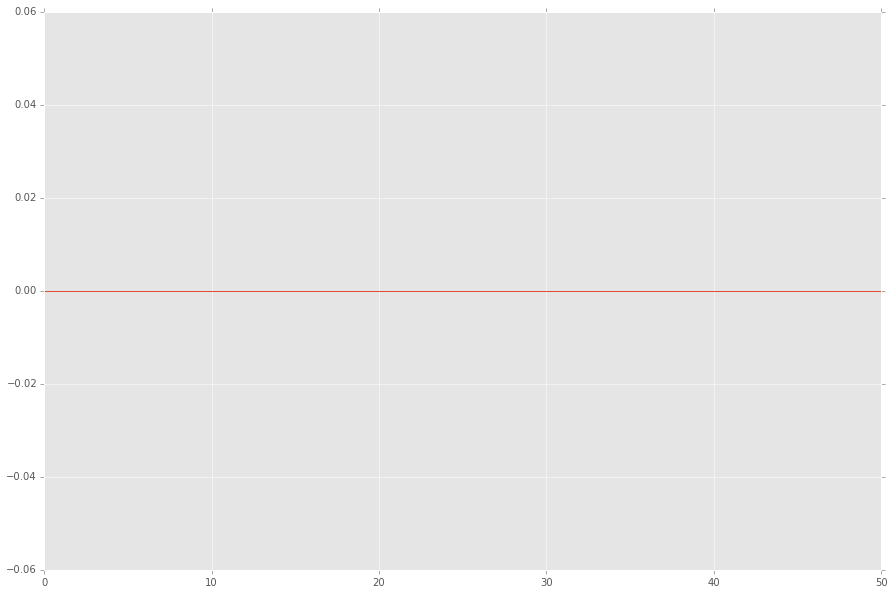

In [6]:
plt.figure(figsize=(15,10))
plt.plot(np.linspace(0,50,50),acc)

In [ ]:
iden = np.eye(10)
acc = np.zeros((1000,2000))
f = plt.figure(figsize = (15,50))
for h in range(301, 401):
    num = Network([64, 14, 10])
    print str(((2000*(h-1))/(2000.*(100))))
    for i in range(2000):
        for dig, ans in zip(digits.data[1:h],digits.target[1:h]):
            num.train(dig*.01,iden[ans])
        cor = 0
        for dig, ans in zip(digits.data, digits.target):
            if num.feedforward(dig*.01).argmax()==ans:
                cor += 1
        acc[h-1,i] = cor/float(len(digits.data))
np.savetxt("Accuracy_Data_run_7_d.dat", acc)

In [11]:
def plot_epochs(az_angle, eleva):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.linspace(0,2000,2000), np.linspace(8,14, 7))
    ax.plot_surface(X, Y, acc)
    ax.view_init(elev=eleva, azim=az_angle)

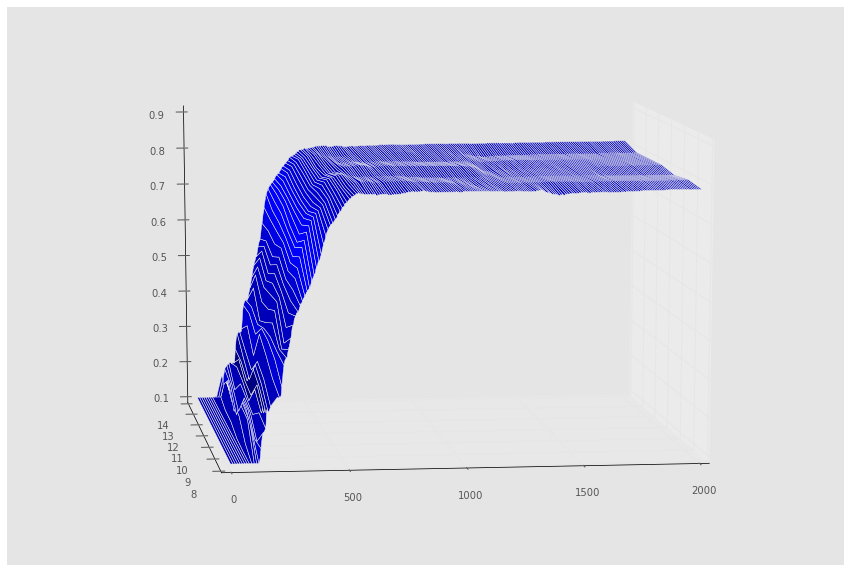

In [12]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1))

In [42]:
print acc


[[ 0.10183639  0.10183639  0.10183639 ...,  0.97161937  0.97161937
   0.97161937]
 [ 0.10183639  0.10183639  0.10183639 ...,  0.97328881  0.97328881
   0.97328881]
 [ 0.10183639  0.10183639  0.10183639 ...,  0.97217585  0.97217585
   0.97217585]
 ..., 
 [ 0.10183639  0.10183639  0.10183639 ...,  0.96939343  0.96939343
   0.96939343]
 [ 0.10183639  0.10183639  0.10183639 ...,  0.97273233  0.97273233
   0.97273233]
 [ 0.10183639  0.10183639  0.10183639 ...,  0.97106288  0.97106288
   0.97106288]]
